# tSNE Exploration Script

Using tSNE to see structures in the expression parameters

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import helpers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting some batches of information

1. Expression
2. Shape
3. Jaw
4. Expression+Jaw
5. Expression+Jaw+Shape

In [6]:
codedict_path = "TestResults/Probanden/"

parameters_probands = helpers.get_params(codedict_path, add_path = "_wo_shape")

Anzahl Aufnahmen: 26
Anzahl Max Expressionen: 9
2


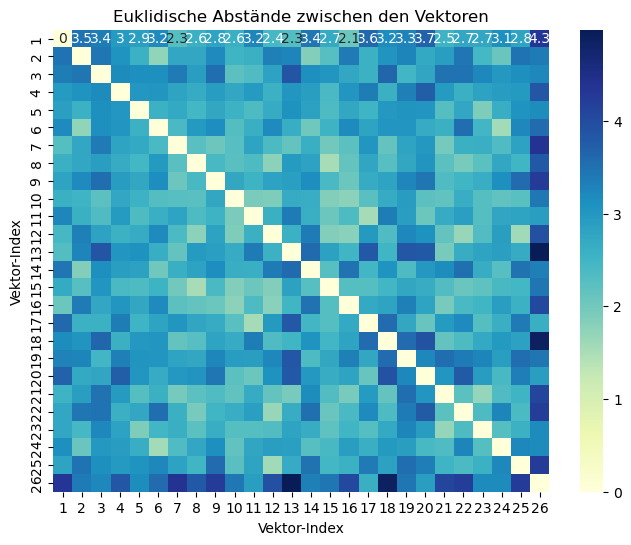

In [9]:
shape_params_extract = np.concatenate([parameters_probands[4], parameters_probands[5]], axis=-1)

shape_params_one = shape_params_extract[2,:,:]


num_vectors = 26

distances = np.zeros((num_vectors, num_vectors))
for i in range(num_vectors):
    for j in range(num_vectors):
        distances[i, j] = np.linalg.norm(shape_params_one[i] - shape_params_one[j])

# Visualisierung als Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(distances, annot=True, cmap="YlGnBu", xticklabels=range(1, num_vectors+1), yticklabels=range(1, num_vectors+1))
plt.title('Euklidische Abstände zwischen den Vektoren')
plt.xlabel('Vektor-Index')
plt.ylabel('Vektor-Index')
plt.show()

Expressionscluster

In [8]:
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8]

expressionnames = ["Neutral", "Augen zu", "Augen doll zu", "Stirn runzeln", "Nase rümpfen", "Lächeln", "Lächeln doll", "Mund spitzen", "Mundwinkel runter"]

helpers.visualization_exp_shape(indices, expressionnames, parameters_probands)

interactive(children=(IntSlider(value=5, description='Perplexity 1:', max=50, min=1), IntSlider(value=5, descr…